In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM, SpatialDropout1D
from keras.layers import TimeDistributed, BatchNormalization
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import pandas as pd 
import numpy as np
import keras
from keras import backend as K
import tensorflow as tf
#import keras_metrics as km
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

## Univariate LSTM


In [3]:
def split_sequence(sequence, n_steps=3):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence) - 1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

def create_model():
    model = Sequential()
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

In [14]:
df = pd.read_csv('clean_targets.csv')
print(df)
seq = np.array(df['consumption'])
print(seq)

# choose a number of time steps
# 24 steps for 24 hours (1day)
n_steps = 24
# choose a number of features
n_features = 1
# split into samples
X, y = split_sequence(seq, n_steps)
# summarize the data
for i in range(len(X)):
	print(X[i], y[i])
    
# train the model
# reshape from [samples, timesteps] into [samples, timesteps, features]  
X = X.reshape((X.shape[0], X.shape[1], n_features))
model = create_model()
model.fit(X, y, epochs=200, verbose=1, validation_split=0.25)

            datetime  consumption
0      01-01-20 0:00      9043.00
1      01-01-20 4:00      9255.00
2      01-01-20 5:00     10350.00
3      01-01-20 6:00      7739.42
4      01-01-20 7:00      7754.58
...              ...          ...
1445  01-03-20 20:00       923.00
1446  01-03-20 21:00      5521.00
1447  01-03-20 22:00      4290.00
1448  01-03-20 23:00      3291.00
1449   02-03-20 0:00      4182.00

[1450 rows x 2 columns]
[ 9043.  9255. 10350. ...  4290.  3291.  4182.]
[ 9043.    9255.   10350.    7739.42  7754.58  9738.68  7987.78  9624.93
  4716.77  6641.58  7127.62  8520.    9444.    8945.    7826.    8493.
  8510.    7735.    8033.    8255.    8009.    7843.    7651.    9522.35] 10578.64
[ 9255.   10350.    7739.42  7754.58  9738.68  7987.78  9624.93  4716.77
  6641.58  7127.62  8520.    9444.    8945.    7826.    8493.    8510.
  7735.    8033.    8255.    8009.    7843.    7651.    9522.35 10578.64] 4020.51
[10350.    7739.42  7754.58  9738.68  7987.78  9624.93  4716.77  6

 2608.   2390.   3553.   3906.   3473.   7697.  ] 4816.0
[6954.   3275.   2763.   4417.   3288.   2697.   4464.33 7928.21 2461.72
 2808.35 2496.89 2470.51 2600.41 4319.61 5007.65 4968.26 4815.   2608.
 2390.   3553.   3906.   3473.   7697.   4816.  ] 3115.0
[3275.   2763.   4417.   3288.   2697.   4464.33 7928.21 2461.72 2808.35
 2496.89 2470.51 2600.41 4319.61 5007.65 4968.26 4815.   2608.   2390.
 3553.   3906.   3473.   7697.   4816.   3115.  ] 3929.0
[2763.   4417.   3288.   2697.   4464.33 7928.21 2461.72 2808.35 2496.89
 2470.51 2600.41 4319.61 5007.65 4968.26 4815.   2608.   2390.   3553.
 3906.   3473.   7697.   4816.   3115.   3929.  ] 3072.0
[4417.   3288.   2697.   4464.33 7928.21 2461.72 2808.35 2496.89 2470.51
 2600.41 4319.61 5007.65 4968.26 4815.   2608.   2390.   3553.   3906.
 3473.   7697.   4816.   3115.   3929.   3072.  ] 3818.0
[3288.   2697.   4464.33 7928.21 2461.72 2808.35 2496.89 2470.51 2600.41
 4319.61 5007.65 4968.26 4815.   2608.   2390.   3553.   3906.   3

 4805.   2264.82 2811.25 3110.29 2715.72 4520.76] 3769.37
[2632.48 3535.82 4270.48 3685.05 2894.   3561.   4741.   2665.   2377.
 3024.   5011.   3437.   7222.   4060.   3167.   2821.   2132.   4805.
 2264.82 2811.25 3110.29 2715.72 4520.76 3769.37] 2286.88
[3535.82 4270.48 3685.05 2894.   3561.   4741.   2665.   2377.   3024.
 5011.   3437.   7222.   4060.   3167.   2821.   2132.   4805.   2264.82
 2811.25 3110.29 2715.72 4520.76 3769.37 2286.88] 3951.09
[4270.48 3685.05 2894.   3561.   4741.   2665.   2377.   3024.   5011.
 3437.   7222.   4060.   3167.   2821.   2132.   4805.   2264.82 2811.25
 3110.29 2715.72 4520.76 3769.37 2286.88 3951.09] 3739.42
[3685.05 2894.   3561.   4741.   2665.   2377.   3024.   5011.   3437.
 7222.   4060.   3167.   2821.   2132.   4805.   2264.82 2811.25 3110.29
 2715.72 4520.76 3769.37 2286.88 3951.09 3739.42] 4193.02
[2894.   3561.   4741.   2665.   2377.   3024.   5011.   3437.   7222.
 4060.   3167.   2821.   2132.   4805.   2264.82 2811.25 3110.29 

 2111.   1709.   6423.   3265.   2791.   4829.  ] 3780.0
[2759.   2395.   3276.   3566.   2026.   2111.   3431.   3294.67 2238.72
 1720.78 3838.81 3755.3  1754.1  1643.59 3226.38 3220.6  2569.   2111.
 1709.   6423.   3265.   2791.   4829.   3780.  ] 1981.0
[2395.   3276.   3566.   2026.   2111.   3431.   3294.67 2238.72 1720.78
 3838.81 3755.3  1754.1  1643.59 3226.38 3220.6  2569.   2111.   1709.
 6423.   3265.   2791.   4829.   3780.   1981.  ] 2775.0
[3276.   3566.   2026.   2111.   3431.   3294.67 2238.72 1720.78 3838.81
 3755.3  1754.1  1643.59 3226.38 3220.6  2569.   2111.   1709.   6423.
 3265.   2791.   4829.   3780.   1981.   2775.  ] 6124.0
[3566.   2026.   2111.   3431.   3294.67 2238.72 1720.78 3838.81 3755.3
 1754.1  1643.59 3226.38 3220.6  2569.   2111.   1709.   6423.   3265.
 2791.   4829.   3780.   1981.   2775.   6124.  ] 3825.0
[2026.   2111.   3431.   3294.67 2238.72 1720.78 3838.81 3755.3  1754.1
 1643.59 3226.38 3220.6  2569.   2111.   1709.   6423.   3265.   279

 2970.63 4418.33 2216.48 2599.03 7710.4  9614.48] 10316.31
[ 3984.55  3333.68  2208.04  2317.    1945.    2806.    3149.    2668.
  3887.    4074.    4287.    4043.    3116.    2353.    2297.    2595.58
  4559.53  2970.63  4418.33  2216.48  2599.03  7710.4   9614.48 10316.31] 3168.19
[ 3333.68  2208.04  2317.    1945.    2806.    3149.    2668.    3887.
  4074.    4287.    4043.    3116.    2353.    2297.    2595.58  4559.53
  2970.63  4418.33  2216.48  2599.03  7710.4   9614.48 10316.31  3168.19] 2888.28
[ 2208.04  2317.    1945.    2806.    3149.    2668.    3887.    4074.
  4287.    4043.    3116.    2353.    2297.    2595.58  4559.53  2970.63
  4418.33  2216.48  2599.03  7710.4   9614.48 10316.31  3168.19  2888.28] 2164.0
[ 2317.    1945.    2806.    3149.    2668.    3887.    4074.    4287.
  4043.    3116.    2353.    2297.    2595.58  4559.53  2970.63  4418.33
  2216.48  2599.03  7710.4   9614.48 10316.31  3168.19  2888.28  2164.  ] 4256.0
[ 1945.    2806.    3149.    2668.    3

 5195.   4208.   3623.   3552.   3332.   3119.  ] 3119.0
[2714.47 3985.18 2822.74 2359.56 2513.   2279.76 2510.75 1903.83 3540.71
 3635.   2172.82 2116.36 2955.   3354.   3176.   2954.   3728.   5195.
 4208.   3623.   3552.   3332.   3119.   3119.  ] 3054.56
[3985.18 2822.74 2359.56 2513.   2279.76 2510.75 1903.83 3540.71 3635.
 2172.82 2116.36 2955.   3354.   3176.   2954.   3728.   5195.   4208.
 3623.   3552.   3332.   3119.   3119.   3054.56] 3030.75
[2822.74 2359.56 2513.   2279.76 2510.75 1903.83 3540.71 3635.   2172.82
 2116.36 2955.   3354.   3176.   2954.   3728.   5195.   4208.   3623.
 3552.   3332.   3119.   3119.   3054.56 3030.75] 3743.63
[2359.56 2513.   2279.76 2510.75 1903.83 3540.71 3635.   2172.82 2116.36
 2955.   3354.   3176.   2954.   3728.   5195.   4208.   3623.   3552.
 3332.   3119.   3119.   3054.56 3030.75 3743.63] 3306.91
[2513.   2279.76 2510.75 1903.83 3540.71 3635.   2172.82 2116.36 2955.
 3354.   3176.   2954.   3728.   5195.   4208.   3623.   3552.   3

Epoch 1/200
1426/1426 [==============================] - 2s 2ms/step - loss: 6017557.4919
Epoch 2/200
1426/1426 [==============================] - 1s 811us/step - loss: 5060472.2398 0s - loss
Epoch 3/200
1426/1426 [==============================] - 1s 819us/step - loss: 6652320.9502
Epoch 4/200
1426/1426 [==============================] - 1s 810us/step - loss: 5518018.5547
Epoch 5/200
1426/1426 [==============================] - 1s 823us/step - loss: 4786747.9173
Epoch 6/200
1426/1426 [==============================] - 1s 811us/step - loss: 4790723.9593 0s - loss: 4839910.51
Epoch 7/200
1426/1426 [==============================] - 1s 805us/step - loss: 6809322.1374
Epoch 8/200
1426/1426 [==============================] - 1s 840us/step - loss: 4250050.1003
Epoch 9/200
1426/1426 [==============================] - 1s 820us/step - loss: 3851221.7335
Epoch 10/200
1426/1426 [==============================] - 1s 873us/step - loss: 4448024.0365
Epoch 11/200
1426/1426 [=========================

1426/1426 [==============================] - 1s 870us/step - loss: 2572449.9762
Epoch 175/200
1426/1426 [==============================] - 1s 853us/step - loss: 2540271.9864
Epoch 176/200
1426/1426 [==============================] - 1s 872us/step - loss: 2516098.9109
Epoch 177/200
1426/1426 [==============================] - 1s 847us/step - loss: 2599784.1988
Epoch 178/200
1426/1426 [==============================] - 1s 856us/step - loss: 2573637.5554
Epoch 179/200
1426/1426 [==============================] - 1s 873us/step - loss: 2531831.3210
Epoch 180/200
1426/1426 [==============================] - 1s 923us/step - loss: 2571168.4407
Epoch 181/200
1426/1426 [==============================] - 1s 999us/step - loss: 2604712.4220
Epoch 182/200
1426/1426 [==============================] - 1s 1ms/step - loss: 2525512.3745
Epoch 183/200
1426/1426 [==============================] - 1s 979us/step - loss: 2598883.8650 0s - loss
Epoch 184/200
1426/1426 [==============================] - 1s 951u

In [15]:
# make a prediction
x_input = seq[-n_steps:]
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(f'Утре очекуваме да имаме: {round(int(yhat))}W/h потрошувачка!')

Утре очекуваме да имаме: 4091W/h потрошувачка!


In [18]:
# plot the model
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_layer_names=True,
    rankdir="TB",
    #expand_nested=False,
    #dpi=96,
)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


### Multi-step model for predicting several days ahead

In [26]:
# multi-step data preparation
from numpy import array
 
# split a univariate sequence into samples
def split_multi_sequence(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

def create_multi_step_model(n_steps_in, n_steps_out):
    # define model
    model = Sequential()
    model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
    model.add(LSTM(100, activation='relu'))
    model.add(Dense(n_steps_out))
    model.compile(optimizer='adam', loss='mse')
    return model

In [31]:
# choose a number of time steps
n_steps_in, n_steps_out = 24, 2
# split into samples
X, y = split_multi_sequence(seq, n_steps_in, n_steps_out)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

model = create_multi_step_model(n_steps_in, n_steps_out)
# fit model
history = model.fit(X, y, epochs=50, verbose=1, validation_split=0.25)


Train on 1068 samples, validate on 357 samples
Epoch 1/50
1068/1068 [==============================] - 3s 3ms/step - loss: 9411123.5599 - val_loss: 5089988.6779
Epoch 2/50
1068/1068 [==============================] - 2s 2ms/step - loss: 8412985.0918 - val_loss: 6349544.6303
Epoch 3/50
1068/1068 [==============================] - 2s 2ms/step - loss: 7583170.3839 - val_loss: 4902665.1933
Epoch 4/50
1068/1068 [==============================] - 2s 2ms/step - loss: 5855763.9185 - val_loss: 3697104.1232
Epoch 5/50
1068/1068 [==============================] - 2s 2ms/step - loss: 5458345.4719 - val_loss: 12067302.2465
Epoch 6/50
1068/1068 [==============================] - 2s 2ms/step - loss: 10625171.5356 - val_loss: 4592576.7507
Epoch 7/50
1068/1068 [==============================] - 2s 2ms/step - loss: 11471144.5000 - val_loss: 8146529.7871
Epoch 8/50
1068/1068 [==============================] - 2s 2ms/step - loss: 6495351.2940 - val_loss: 9173489.5686
Epoch 9/50
1068/1068 [================

Утре очекуваме да имаме: 3496 W/h потрошувачка! А задутре: 3670 W/h потрошувачка! 


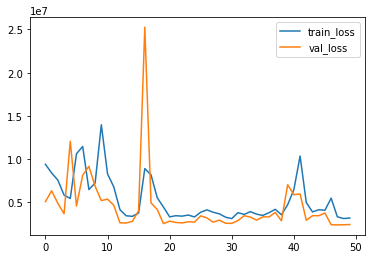

In [34]:
# demonstrate prediction
x_input = seq[-n_steps:]
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
arr = yhat.flatten()
utre = round(int(arr[0]))
zadutre = round(int(arr[1]))
print(f'Утре очекуваме да имаме: {utre} W/h потрошувачка! А задутре: {zadutre} W/h потрошувачка! ')

import matplotlib.pyplot as plt

plt.subplot()
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [71]:
prediction_sequence = df.iloc[::24,:]
prediction_sequence
predictions = []

predictions = model.predict(X)

for prediction in prediction_sequence:
    x_input = np.array(df['consumption'])[-24:]
    predictions.append(model.predict(x_input)
                       
print(predictions)
#df['predictions'] = predictions
# _ = df[['consumption','predictions']].plot(figsize=(15, 5))
# import matplotlib.pyplot as plt

# plt.subplot()
# plt.plot(history.history['loss'], label='train_loss')
# plt.plot(history.history['val_loss'], label='val_loss')
# plt.legend()
# plt.show()

SyntaxError: invalid syntax (<ipython-input-71-dd8266f2b816>, line 9)

1425
1450


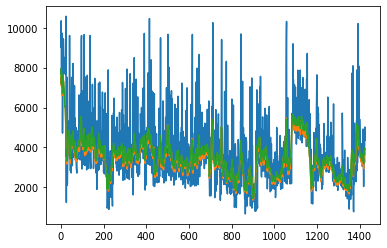

In [104]:
predictions = model.predict(X)
print(len(predictions))
consumptions = df['consumption']
print(len(consumptions))
# df['prediction'] = predictions
# df
# shift train predictions for plotting
# trainPredictPlot = np.empty_like(df)
# trainPredictPlot[:, :] = np.nan
trainPredictPlot = []
trainPredictPlot[n_steps:len(consumptions)+n_steps] = consumptions[:-24]
# shift test predictions for plotting
# testPredictPlot = np.empty_like(df)
# testPredictPlot[:, :] = np.nan
testPredictPlot = []
testPredictPlot[len(predictions)+(n_steps*2)+1:len(df)-1] = predictions
# plot baseline and predictions
#plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [121]:
# Plot the forecast with the actuals

# report = pd.DataFrame(np.array([df['datetime'], df['consumption'], testPredictPlot]),
#                    columns=['datetime', 'consumption', 'prediction'])
# report
#d = {'predictions': testPredictPlot}
predict_set = df[:1450]
predict_set['predictions'] = testPredictPlot[0]
#predictions = pd.DataFrame(data=d, dtype=np.float, index = df['datetime'])
report = pd.concat([df, predict_set], sort=False)
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = report[['consumption','predictions']].plot(ax=ax,
                                              style=['-','-'])
ax.set_xbound(lower='02-13-2020', upper='03-03-2020')
ax.set_ylim(-100, 1000)
plot = plt.suptitle('Forecast vs Actuals')

ValueError: Length of values does not match length of index